APT（Arbitrage pricing theory）套利定价理论

套利定价理论认为，套利行为是现代有效率市场（即市场均衡价格）形成的一个决定因素。如果市场未达到均衡状态的话，市场上就会存在无风险套利机会。并且用多个因素来解释风险资产收益，并根据无套利原则，得到风险资产均衡收益与多个因素之间存在（近似的）线性关系，其定价方程是：

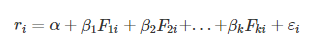

Ri是第i个股票的收益率， Fki是第i个股票第k个因子的值，这个方程和多元线性回归模型的方程是一致的，因此可以用线性回归的方法来估计参数并根据当前的因子值预测未来的收益。

> APT 相当于一个多因子模型，证券收益通过权重系数得到回归，但是并没有指出其中的具体因子是什么

那么我们应该如何选择因子呢？

根据入门级内容，我们可以先主观的选定如下因子：

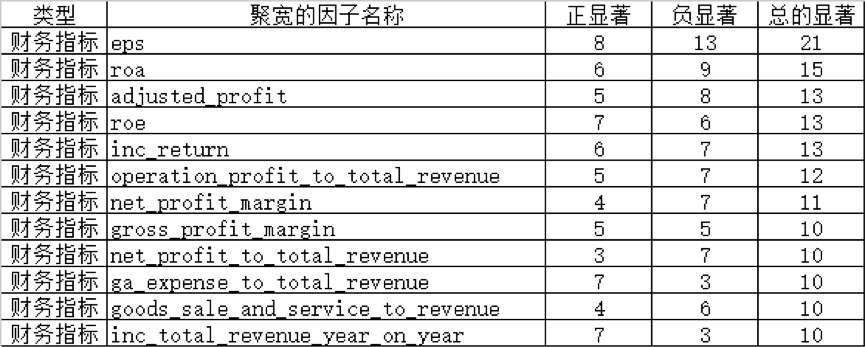

但这些因子中的一部分本来就存在一定的相关关系，比如roe和inc_return。这两者具有高度相关性。这个现象被称作“多重共线性”，指的是线性回归模型中的解释变量之间彼此之间度相关，从而使模型失真。

那么多重共线性应该如何处理呢？

主流的解决方法有如下几种：  
1. 排除引起共线性的变量：找出引起多重共线性的解释变量，将它排除出去，以逐步回归法得到最广泛的应用。  
2. 差分法：时间序列数据、线性模型：将原模型变换为差分模型。  
3. 减小参数估计量的方差：岭回归法；等等等等。  

以第一种方法为例，讲述如何排除引起共线性的变量。就实排除的方法也有很多种，比如相关系数法、修正的R方法、主成分分析法、人工判断法等。我们继续简化，用相关系数法进行处理。思路是采用因子的数据，直接计算普通的相关系数，然后从相关系数较大的几个因子中选择一个。参见下表：

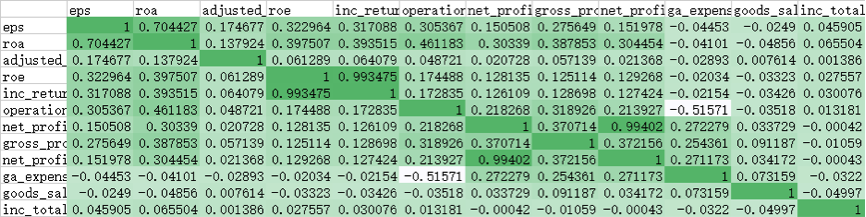

发现roe和inc_return的相关系数0.99十分显眼，把这个inc_return拉出去砍了！去掉后结果如下图所示：

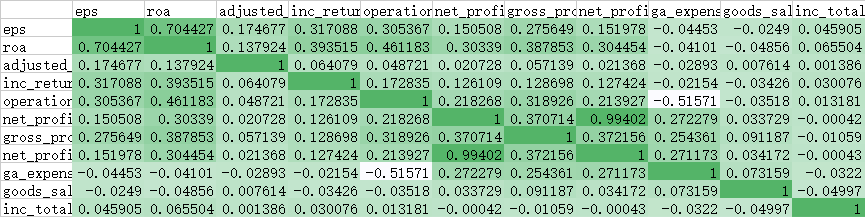


发现net_profit_to_total_revenue和net_profit_margin相关性也很大，而且eps和roa相关性也较大，我们继续手起刀落手起刀落。结果如下图所示：

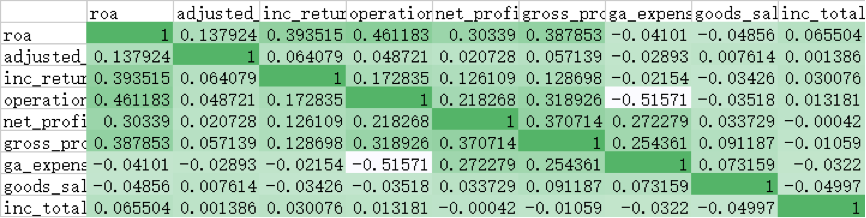

eps还有用，换掉roa

在删掉了相关性较大的因子之后，终于选出了9个因子：

eps（每股收益EPS(元)）  
adjusted_profit（扣除非经常损益后的净利润(元)）  
inc_return（净资产收益率(扣除非经常损益)(%)）  
operation_profit_to_total_revenue（营业利润/营业总收入(%)）  
net_profit_margin（销售净利率(%)）  
gross_profit_margin（销售毛利率(%)）  
ga_expense_to_total_revenue（管理费用/营业总收入(%)）  
goods_sale_and_service_to_revenue（销售商品提供劳务收到的现金/营业收入(%)）  
inc_total_revenue_year_on_year（营业总收入同比增长率(%)）  



策略实现

选择沪深300 作为股票池